# Importando Librerias Necesarias

In [6]:
import pandas as pd
import numpy as np
import random

from pprint import pprint
%matplotlib inline

from funciones_arbol import algoritmo_arbol, prediccion_arbol_decision
from funciones_apoyo import entrenamiento_prueba_split, calcular_precision

# Preparando los datos

In [4]:
df_vino = pd.read_csv('../data/winequality-red.csv')
df_vino['label'] = df_vino.quality
df_vino = df_vino.drop('quality', axis=1)

column_names = []
for column in df_vino.columns:
    name = column.replace(' ',"_")
    column_names.append(name)
df_vino.columns = column_names

In [5]:
df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
def transformar_label(valor):
    if valor <= 5:
        return 'Malo' 
    else:
        return 'Bueno'
df_vino['label'] = df_vino.label.apply(transformar_label)

df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Malo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Malo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bueno
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo


Bueno    0.534709
Malo     0.465291
Name: label, dtype: float64

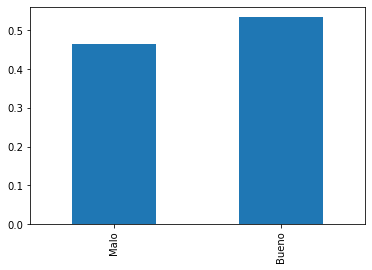

In [10]:
calidad_vino = df_vino.label.value_counts(normalize = True)
calidad_vino[['Malo', 'Bueno']].plot(kind='bar')
calidad_vino

In [12]:
random.seed(0)
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df_vino, tamanio_prueba = 0.2)
df_prueba

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
788,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,Bueno
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,Bueno
861,5.8,1.010,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,Bueno
82,7.4,0.500,0.47,2.0,0.086,21.0,73.0,0.99700,3.36,0.57,9.1,Malo
530,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...
562,9.0,0.540,0.49,2.9,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,Malo
927,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,Malo
525,10.4,0.640,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,Malo
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,Malo


In [30]:
def bootstrapping(df_entrenamiento, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(df_entrenamiento), size=n_bootstrap)
    df_bootstrapped = df_entrenamiento.iloc[bootstrap_indices]
    
    return df_bootstrapped

def algoritmo_bosque_aleatorio(df_entrenamiento, n_arboles, n_bootstraps, n_caracteristicas, ad_max_profundidad):
    bosque = []
    for i in range(n_arboles):
        df_bootstrapped = bootstrapping(df_entrenamiento, n_bootstraps)
        arbol = algoritmo_arbol(df_bootstrapped, max_profundidad=ad_max_profundidad, random_subespacio=n_caracteristicas)
        bosque.append(arbol)
    return bosque

def predicciones_bosque_aleatorio(df_prueba, bosque):
    df_predicciones = {}
    for i in range(len(bosque)):
        columna_nombre = 'arbol_{}'.format(i)
        predicciones = prediccion_arbol_decision(df_prueba, arbol = bosque[i])
        df_predicciones[columna_nombre] = predicciones
        df_predicciones = pd.DataFrame(df_predicciones)
        predicciones_bosque_aleatorio = df_predicciones.mode(axis=1)[0]
    return predicciones_bosque_aleatorio, df_predicciones

In [31]:
bosque = algoritmo_bosque_aleatorio

In [32]:
predicciones, df_predicciones = predicciones_bosque_aleatorio(df_prueba, bosque)

TypeError: object of type 'function' has no len()

# Probando Codigo

## Generamos un bosque aleatorio

In [33]:
bosque = algoritmo_bosque_aleatorio(df_entrenamiento, n_arboles=4, n_bootstraps=800, n_caracteristicas=4, ad_max_profundidad=4)

## Verificomos los Boques 

In [34]:
predicciones, df_predicciones = predicciones_bosque_aleatorio(df_prueba, bosque)
df_predicciones

,arbol_0,arbol_1,arbol_2,arbol_3
788,Bueno,Bueno,Bueno,Malo
1552,Malo,Bueno,Malo,Bueno
861,Bueno,Bueno,Bueno,Malo
82,Bueno,Malo,Bueno,Malo
530,Bueno,Bueno,Bueno,Bueno
...,...,...,...,...
562,Bueno,Malo,Malo,Malo
927,Malo,Malo,Malo,Malo
525,Malo,Bueno,Malo,Malo
273,Malo,Malo,Malo,Malo


In [35]:
predicciones

788     Bueno
1552    Bueno
861     Bueno
82      Bueno
530     Bueno
        ...  
562      Malo
927      Malo
525      Malo
273      Malo
1338     Malo
Name: 0, Length: 320, dtype: object

In [36]:
precision = calcular_precision(predicciones, df_prueba.label)
print (f'El bosque tiene una precision de {precision * 100} %') 

El bosque tiene una precision de 71.875 %
